In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
#sns.set_context("poster")

In [2]:
covid = pd.read_csv("../Dataset/covid_prov_id.csv")
covid

,date,province,new_cases,new_deaths,new_recoveries,new_hospitalizations,total_cases,total_deaths,total_recoveries,total_hospitalizations
0,2020-03-06,Banten,1,0,1,0,1,1,0,0
1,2020-03-07,Banten,0,0,0,0,1,1,0,0
2,2020-03-08,Banten,1,0,3,-2,2,4,0,-2
3,2020-03-09,Banten,0,0,0,0,2,4,0,-2
4,2020-03-10,Banten,0,0,8,-8,2,12,0,-10
...,...,...,...,...,...,...,...,...,...,...
16613,2021-07-16,Papua,292,0,0,292,23051,11733,213,11105
16614,2021-07-17,Papua,200,0,0,200,23251,11733,213,11305
16615,2021-07-18,Papua,135,3,63,69,23386,11796,216,11374
16616,2021-07-19,Papua,180,0,0,180,23566,11796,216,11554


# Periode 2021-06-01 hingga 2021-07-20

In [3]:
jawa = covid[covid['province'].isin(['Banten', 'DKI Jakarta', 'Jawa Barat', 'Jawa Tengah', 
                                     'Daerah Istimewa Yogyakarta', 'Jawa Timur', 'Bali'])]
jawa.head()

,date,province,new_cases,new_deaths,new_recoveries,new_hospitalizations,total_cases,total_deaths,total_recoveries,total_hospitalizations
0,2020-03-06,Banten,1,0,1,0,1,1,0,0
1,2020-03-07,Banten,0,0,0,0,1,1,0,0
2,2020-03-08,Banten,1,0,3,-2,2,4,0,-2
3,2020-03-09,Banten,0,0,0,0,2,4,0,-2
4,2020-03-10,Banten,0,0,8,-8,2,12,0,-10


In [22]:
jawa_cases = jawa[(jawa['date'] >= '2021-06-01') & (jawa['date'] <= '2021-07-20')]
jawa_cases_grouped = jawa_cases.groupby('date')[['new_cases', 'new_deaths', 'new_recoveries']].mean().reset_index()

banten_cases = jawa[jawa['province'] == 'Banten'] 
banten_cases = banten_cases[(banten_cases['date'] >= '2021-06-01') & (banten_cases['date'] <= '2021-07-20')]

dki_cases = jawa[jawa['province'] == 'DKI Jakarta']
dki_cases = dki_cases[(dki_cases['date'] >= '2021-06-01') & (dki_cases['date'] <= '2021-07-20')]

jabar_cases = jawa[jawa['province'] == 'Jawa Barat']
jabar_cases = jabar_cases[(jabar_cases['date'] >= '2021-06-01') & (jabar_cases['date'] <= '2021-07-20')]

jateng_cases = jawa[jawa['province'] == 'Jawa Tengah']
jateng_cases = jateng_cases[(jateng_cases['date'] >= '2021-06-01') & (jateng_cases['date'] <= '2021-07-20')]

diy_cases = jawa[jawa['province'] == 'Daerah Istimewa Yogyakarta']
diy_cases = diy_cases[(diy_cases['date'] >= '2021-06-01') & (diy_cases['date'] <= '2021-07-20')]

jatim_cases = jawa[jawa['province'] == 'Jawa Timur']
jatim_cases = jatim_cases[(jatim_cases['date'] >= '2021-06-01') & (jatim_cases['date'] <= '2021-07-20')]

bali_cases = jawa[jawa['province'] == 'Bali']
bali_cases = bali_cases[(bali_cases['date'] >= '2021-06-01') & (bali_cases['date'] <= '2021-07-20')]

In [31]:
jawa_cases_grouped[jawa_cases_grouped['new_cases'] == jawa_cases_grouped['new_cases'].max()]

,date,new_cases,new_deaths,new_recoveries
44,2021-07-15,6274.714286,114.142857,2040.0


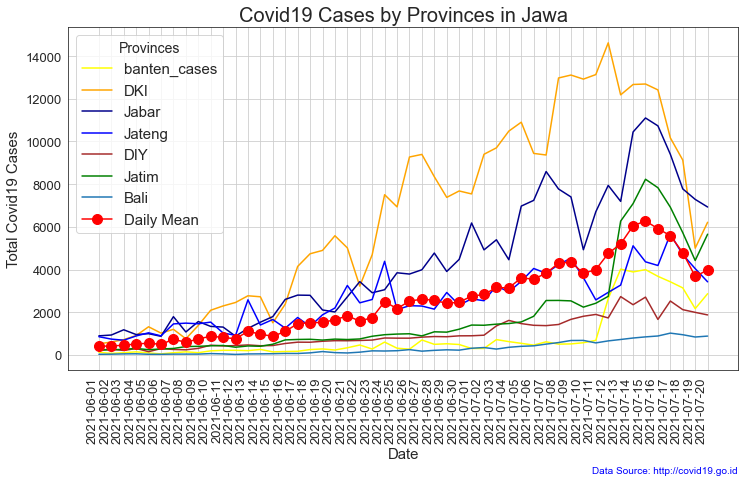

In [32]:
fig,ax = plt.subplots(figsize=(12,7))

ax.plot(banten_cases['date'], banten_cases['new_cases'], label='banten_cases', color='yellow')
ax.plot(dki_cases['date'], dki_cases['new_cases'], label='DKI', color='orange')
ax.plot(jabar_cases['date'], jabar_cases['new_cases'], label='Jabar', color='darkblue')
ax.plot(jateng_cases['date'], jateng_cases['new_cases'], label='Jateng', color='blue')
ax.plot(diy_cases['date'], diy_cases['new_cases'], label='DIY', color='brown')
ax.plot(jatim_cases['date'], jatim_cases['new_cases'], label='Jatim', color='green')
ax.plot(bali_cases['date'], bali_cases['new_cases'], label='Bali')
ax.plot(jawa_cases_grouped['date'], jawa_cases_grouped['new_cases'], color='red', 
        label='Daily Mean', marker="o", markersize=10)


ax.set_xlabel("Date", fontsize=15, loc='center')
ax.set_ylabel("Total Covid19 Cases", fontsize=15, loc='center')
ax.set_title("Covid19 Cases by Provinces in Jawa", fontsize=20)
ax.tick_params(axis='both', labelsize= 13)
ax.text(1, -0.3, 'Data Source: http://covid19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
fig.autofmt_xdate(rotation=90)

plt.legend(title="Provinces", fontsize=15, title_fontsize=14)
plt.grid()
#plt.tight_layout()
plt.show()

# Before and During PPKM

In [6]:
jawa_before = jawa[(jawa['date'] >= '2021-06-01') & (jawa['date'] <= '2021-07-02')]
jawa_before

,date,province,new_cases,new_deaths,new_recoveries,new_hospitalizations,total_cases,total_deaths,total_recoveries,total_hospitalizations
452,2021-06-01,Banten,119,1,30,88,49595,46781,1253,1561
453,2021-06-02,Banten,69,0,55,14,49664,46836,1253,1575
454,2021-06-03,Banten,100,3,87,10,49764,46923,1256,1585
455,2021-06-04,Banten,142,3,23,116,49906,46946,1259,1701
456,2021-06-05,Banten,89,2,33,54,49995,46979,1261,1755
...,...,...,...,...,...,...,...,...,...,...
3541,2021-06-28,Bali,212,5,0,207,49759,46387,1559,1813
3542,2021-06-29,Bali,238,1,0,237,49997,46387,1560,2050
3543,2021-06-30,Bali,221,0,0,221,50218,46387,1560,2271
3544,2021-07-01,Bali,311,9,0,302,50529,46387,1569,2573


In [7]:
banten_before = jawa_before[jawa_before['province'] == 'Banten'] 
dki_before = jawa_before[jawa_before['province'] == 'DKI Jakarta']
jabar_before = jawa_before[jawa_before['province'] == 'Jawa Barat']
jateng_before = jawa_before[jawa_before['province'] == 'Jawa Tengah']
diy_before = jawa_before[jawa_before['province'] == 'Daerah Istimewa Yogyakarta']
jatim_before = jawa_before[jawa_before['province'] == 'Jawa Timur']
bali_before = jawa_before[jawa_before['province'] == 'Bali']

In [8]:
jawa_ppkm = jawa[(jawa['date'] >= '2021-07-03') & (jawa['date'] <= '2021-07-20')]
jawa_ppkm

,date,province,new_cases,new_deaths,new_recoveries,new_hospitalizations,total_cases,total_deaths,total_recoveries,total_hospitalizations
484,2021-07-03,Banten,715,7,21,687,58441,49713,1404,7324
485,2021-07-04,Banten,621,17,25,579,59062,49738,1421,7903
486,2021-07-05,Banten,541,3,25,513,59603,49763,1424,8416
487,2021-07-06,Banten,457,6,268,183,60060,50031,1430,8599
488,2021-07-07,Banten,612,13,168,431,60672,50199,1443,9030
...,...,...,...,...,...,...,...,...,...,...
3559,2021-07-16,Bali,885,21,0,864,59212,46798,1725,10689
3560,2021-07-17,Bali,1019,0,0,1019,60231,46798,1725,11708
3561,2021-07-18,Bali,944,1,0,943,61175,46798,1726,12651
3562,2021-07-19,Bali,837,0,0,837,62012,46798,1726,13488


In [9]:
banten_ppkm = jawa_ppkm[jawa_ppkm['province'] == 'Banten'] 
dki_ppkm = jawa_ppkm[jawa_ppkm['province'] == 'DKI Jakarta']
jabar_ppkm = jawa_ppkm[jawa_ppkm['province'] == 'Jawa Barat']
jateng_ppkm = jawa_ppkm[jawa_ppkm['province'] == 'Jawa Tengah']
diy_ppkm = jawa_ppkm[jawa_ppkm['province'] == 'Daerah Istimewa Yogyakarta']
jatim_ppkm = jawa_ppkm[jawa_ppkm['province'] == 'Jawa Timur']
bali_ppkm = jawa_ppkm[jawa_ppkm['province'] == 'Bali']

# Perbandingan penambahan kasus baru sebelum ppkm darurat dan ketika ppkm darurat

In [10]:
jawa_before_cases = jawa_before.groupby("date").mean().reset_index()
jawa_before_cases.head()

,date,new_cases,new_deaths,new_recoveries,new_hospitalizations,total_cases,total_deaths,total_recoveries,total_hospitalizations
0,2021-06-01,407.571429,10.857143,439.857143,-43.142857,177604.285714,164262.857143,5152.571429,8188.857143
1,2021-06-02,411.428571,16.714286,583.142857,-188.428571,178015.714286,164846.000000,5169.285714,8000.428571
2,2021-06-03,455.714286,15.714286,1299.714286,-859.714286,178471.428571,166145.714286,5185.000000,7140.714286
3,2021-06-04,505.428571,18.285714,519.571429,-32.428571,178976.857143,166665.285714,5203.285714,7108.285714
4,2021-06-05,550.714286,12.857143,287.000000,250.857143,179527.571429,166952.285714,5216.142857,7359.142857


In [11]:
jawa_ppkm_cases = jawa_ppkm.groupby("date").mean().reset_index()
jawa_ppkm_cases.head()

,date,new_cases,new_deaths,new_recoveries,new_hospitalizations,total_cases,total_deaths,total_recoveries,total_hospitalizations
0,2021-07-03,3157.428571,52.428571,1505.142857,1599.857143,225829.714286,188423.857143,6112.857143,31293.000000
1,2021-07-04,3136.714286,53.000000,1452.571429,1631.142857,228966.428571,189876.428571,6165.857143,32924.142857
2,2021-07-05,3610.000000,61.285714,1628.000000,1920.714286,232576.428571,191504.428571,6227.142857,34844.857143
3,2021-07-06,3543.000000,83.285714,1926.857143,1532.857143,236119.428571,193431.285714,6310.428571,36377.714286
4,2021-07-07,3830.428571,111.000000,1731.571429,1987.857143,239949.857143,195162.857143,6421.428571,38365.571429


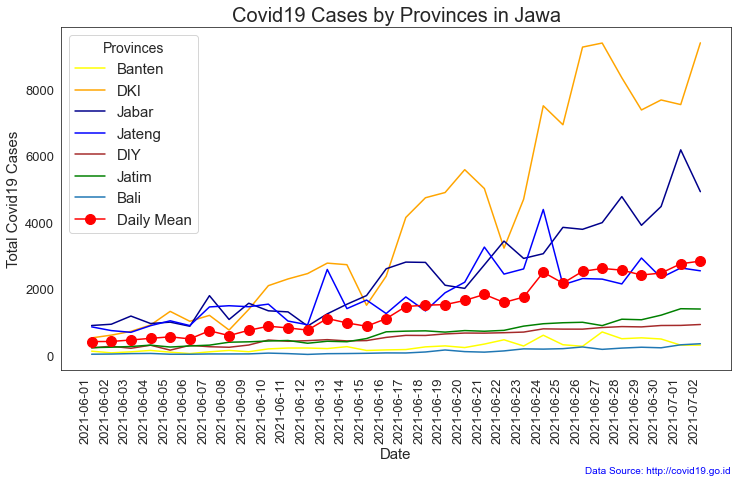

In [12]:
fig,ax = plt.subplots(figsize=(12,7))

ax.plot(banten_before['date'], banten_before['new_cases'], label='Banten', color='yellow')
ax.plot(dki_before['date'], dki_before['new_cases'], label='DKI', color='orange')
ax.plot(jabar_before['date'], jabar_before['new_cases'], label='Jabar', color='darkblue')
ax.plot(jateng_before['date'], jateng_before['new_cases'], label='Jateng', color='blue')
ax.plot(diy_before['date'], diy_before['new_cases'], label='DIY', color='brown')
ax.plot(jatim_before['date'], jatim_before['new_cases'], label='Jatim', color='green')
ax.plot(bali_before['date'], bali_before['new_cases'], label='Bali')
ax.plot(jawa_before_cases['date'], jawa_before_cases['new_cases'], color='red',
        label='Daily Mean', marker="o", markersize=10)

ax.set_xlabel("Date", fontsize=15, loc='center')
ax.set_ylabel("Total Covid19 Cases", fontsize=15, loc='center')
ax.set_title("Covid19 Cases by Provinces in Jawa", fontsize=20)
ax.tick_params(axis='both', labelsize= 13)
ax.text(1, -0.3, 'Data Source: http://covid19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
fig.autofmt_xdate(rotation=90)

plt.legend(title="Provinces", fontsize=15, title_fontsize=14)
#plt.grid()
#plt.tight_layout()
plt.show()

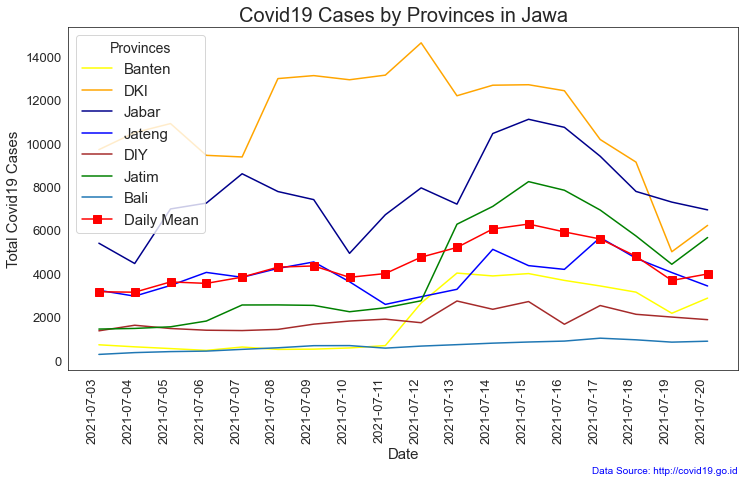

In [13]:
fig,ax = plt.subplots(figsize=(12,7))

ax.plot(banten_ppkm['date'], banten_ppkm['new_cases'], label='Banten', color='yellow')
ax.plot(dki_ppkm['date'], dki_ppkm['new_cases'], label='DKI', color='orange')
ax.plot(jabar_ppkm['date'], jabar_ppkm['new_cases'], label='Jabar', color='darkblue')
ax.plot(jateng_ppkm['date'], jateng_ppkm['new_cases'], label='Jateng', color='blue')
ax.plot(diy_ppkm['date'], diy_ppkm['new_cases'], label='DIY', color='brown')
ax.plot(jatim_ppkm['date'], jatim_ppkm['new_cases'], label='Jatim', color='green')
ax.plot(bali_ppkm['date'], bali_ppkm['new_cases'], label='Bali')
ax.plot(jawa_ppkm_cases['date'], jawa_ppkm_cases['new_cases'], label='Daily Mean', 
        color='red', marker="s", markersize=8)

ax.set_xlabel("Date", fontsize=15, loc='center')
ax.set_ylabel("Total Covid19 Cases", fontsize=15, loc='center')
ax.set_title("Covid19 Cases by Provinces in Jawa", fontsize=20)
ax.tick_params(axis='both', labelsize= 13)
ax.text(1, -0.3, 'Data Source: http://covid19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
fig.autofmt_xdate(rotation=90)

plt.legend(title="Provinces", fontsize=15, title_fontsize=14)
#plt.grid()
#plt.tight_layout()
plt.show()

# Perbandingan penambahan kasus kematian karena covid sebelum dan ketika ppkm darurat

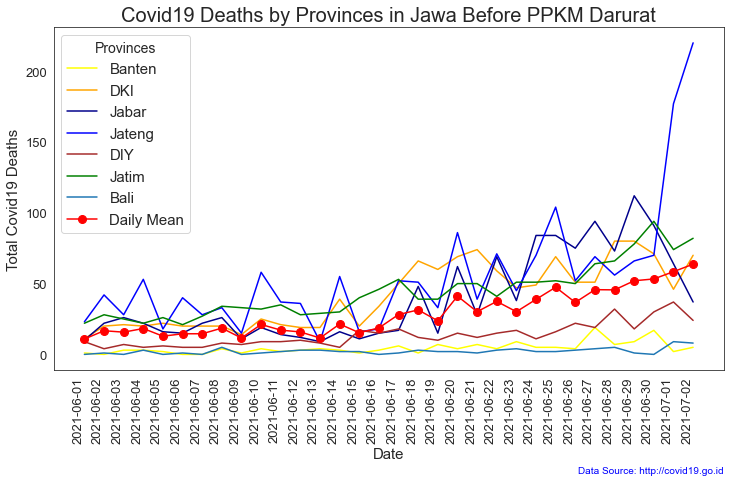

In [14]:
fig,ax = plt.subplots(figsize=(12,7))

ax.plot(banten_before['date'], banten_before['new_deaths'], label='Banten', color='yellow')
ax.plot(dki_before['date'], dki_before['new_deaths'], label='DKI', color='orange')
ax.plot(jabar_before['date'], jabar_before['new_deaths'], label='Jabar', color='darkblue')
ax.plot(jateng_before['date'], jateng_before['new_deaths'], label='Jateng', color='blue')
ax.plot(diy_before['date'], diy_before['new_deaths'], label='DIY', color='brown')
ax.plot(jatim_before['date'], jatim_before['new_deaths'], label='Jatim', color='green')
ax.plot(bali_before['date'], bali_before['new_deaths'], label='Bali')
ax.plot(jawa_before_cases['date'], jawa_before_cases['new_deaths'],
        color= 'red', label='Daily Mean', marker="o", markersize=8)

ax.set_xlabel("Date", fontsize=15, loc='center')
ax.set_ylabel("Total Covid19 Deaths", fontsize=15, loc='center')
ax.set_title("Covid19 Deaths by Provinces in Jawa Before PPKM Darurat", fontsize=20)
ax.tick_params(axis='both', labelsize= 13)
ax.text(1, -0.3, 'Data Source: http://covid19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
fig.autofmt_xdate(rotation=90)

plt.legend(title="Provinces", fontsize=15, title_fontsize=14)
#plt.grid()
#plt.tight_layout()
plt.show()

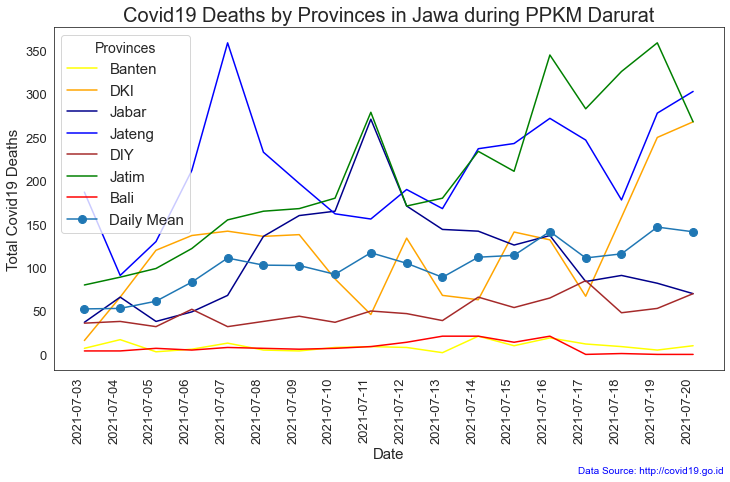

In [15]:
fig,ax = plt.subplots(figsize=(12,7))

ax.plot(banten_ppkm['date'], banten_ppkm['new_deaths'], label='Banten', color='yellow')
ax.plot(dki_ppkm['date'], dki_ppkm['new_deaths'], label='DKI', color='orange')
ax.plot(jabar_ppkm['date'], jabar_ppkm['new_deaths'], label='Jabar', color='darkblue')
ax.plot(jateng_ppkm['date'], jateng_ppkm['new_deaths'], label='Jateng', color='blue')
ax.plot(diy_ppkm['date'], diy_ppkm['new_deaths'], label='DIY', color='brown')
ax.plot(jatim_ppkm['date'], jatim_ppkm['new_deaths'], label='Jatim', color='green')
ax.plot(bali_ppkm['date'], bali_ppkm['new_deaths'], label='Bali', color='red')
ax.plot(jawa_ppkm_cases['date'], jawa_ppkm_cases['new_deaths'], label='Daily Mean', marker="o", markersize=8)

ax.set_xlabel("Date", fontsize=15, loc='center')
ax.set_ylabel("Total Covid19 Deaths", fontsize=15, loc='center')
ax.set_title("Covid19 Deaths by Provinces in Jawa during PPKM Darurat", fontsize=20)
ax.tick_params(axis='both', labelsize= 13)
ax.text(1, -0.3, 'Data Source: http://covid19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
fig.autofmt_xdate(rotation=90)

plt.legend(title="Provinces", fontsize=15, title_fontsize=14)
#plt.grid()
#plt.tight_layout()
plt.show()

# Perbandingan orang yang sembuh dari covid sebelum dan ketika ppkm darurat

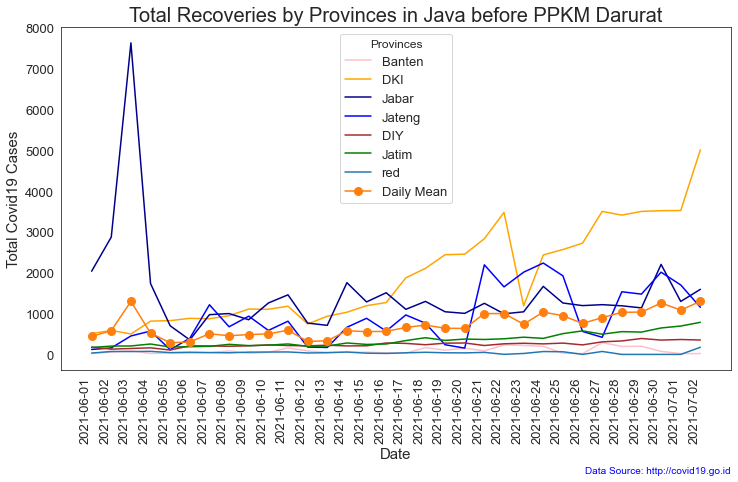

In [16]:
fig,ax = plt.subplots(figsize=(12,7))

ax.plot(banten_before['date'], banten_before['new_recoveries'], label='Banten', color='pink')
ax.plot(dki_before['date'], dki_before['new_recoveries'], label='DKI', color='orange')
ax.plot(jabar_before['date'], jabar_before['new_recoveries'], label='Jabar', color='darkblue')
ax.plot(jateng_before['date'], jateng_before['new_recoveries'], label='Jateng', color='blue')
ax.plot(diy_before['date'], diy_before['new_recoveries'], label='DIY', color='brown')
ax.plot(jatim_before['date'], jatim_before['new_recoveries'], label='Jatim', color='green')
ax.plot(bali_before['date'], bali_before['new_recoveries'], label='red')
ax.plot(jawa_before_cases['date'], jawa_before_cases['new_recoveries'], label='Daily Mean', marker="o", markersize=8)

ax.set_xlabel("Date", fontsize=15, loc='center')
ax.set_ylabel("Total Covid19 Cases", fontsize=15, loc='center')
ax.set_title("Total Recoveries by Provinces in Java before PPKM Darurat", fontsize=20)
ax.tick_params(axis='both', labelsize= 13)
ax.text(1, -0.3, 'Data Source: http://covid19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
fig.autofmt_xdate(rotation=90)

plt.legend(title="Provinces", fontsize=13, title_fontsize=12)
#plt.grid()
#plt.tight_layout()
plt.show()

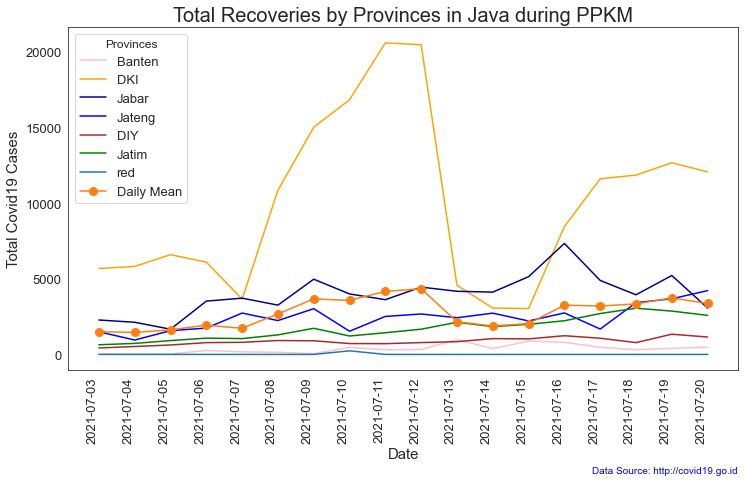

In [17]:
fig,ax = plt.subplots(figsize=(12,7))

ax.plot(banten_ppkm['date'], banten_ppkm['new_recoveries'], label='Banten', color='pink')
ax.plot(dki_ppkm['date'], dki_ppkm['new_recoveries'], label='DKI', color='orange')
ax.plot(jabar_ppkm['date'], jabar_ppkm['new_recoveries'], label='Jabar', color='darkblue')
ax.plot(jateng_ppkm['date'], jateng_ppkm['new_recoveries'], label='Jateng', color='blue')
ax.plot(diy_ppkm['date'], diy_ppkm['new_recoveries'], label='DIY', color='brown')
ax.plot(jatim_ppkm['date'], jatim_ppkm['new_recoveries'], label='Jatim', color='green')
ax.plot(bali_ppkm['date'], bali_ppkm['new_recoveries'], label='red')
ax.plot(jawa_ppkm_cases['date'], jawa_ppkm_cases['new_recoveries'], label='Daily Mean', marker="o", markersize=8)

ax.set_xlabel("Date", fontsize=15, loc='center')
ax.set_ylabel("Total Covid19 Cases", fontsize=15, loc='center')
ax.set_title("Total Recoveries by Provinces in Java during PPKM", fontsize=20)
ax.tick_params(axis='both', labelsize= 13)
ax.text(1, -0.3, 'Data Source: http://covid19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
fig.autofmt_xdate(rotation=90)

plt.legend(title="Provinces", fontsize=13, title_fontsize=12)
#plt.grid()
#plt.tight_layout()
plt.show()

## Adakah hubungan antara penambahan kasus baru dengan populasi?
### antar pulau 
### antar provinsi di pulau jawa

In [ ]:
data_prov = pd.read_excel("../../../../data_provinsi.xlsx")
data_prov

In [ ]:
latest_covid_jawa = jawa[jawa['date'] == '2021-07-20'][['province', 
                                    'total_cases', 
                                    'total_deaths', 
                                    'total_recoveries']].reset_index(drop=True)

data_prov_join = data_prov.merge(latest_covid_jawa, 
                                how='left',
                                left_on=['Provinsi'], 
                                right_on=['province'])

data_prov_join

In [ ]:
data_prov_join.to_excel('data_prov_corr_cases.xlsx')

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Jumlah Penduduk', y='total_cases', data=data_prov_join, hue='province', s=800)

In [ ]:
#laju pertumbuhan penduduk

plt.figure(figsize=(10,5))
sns.scatterplot(x='Laju Pertumbuhan Penduduk per Tahun', 
                y='total_cases', data=data_prov_join, hue='province', s=800)

## Adakah hubungan antara penambahan kasus baru dengan kepadatan penduduk?
### antar pulau 
### antar provinsi di pulau jawa

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Kepadatan Penduduk per km persegi (km2)', 
                y='total_cases', data=data_prov_join, hue='province', s=800)

## Adakah hubungan antara penambahan kasus baru dengan tingkat kemakmuran provinsi?
### antar pulau 
### antar provinsi di pulau jawa

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='PRDB', y='total_cases', data=data_prov_join, hue='province', s=800)

## Adakah hubungan antara Covid dengan Curah?

In [ ]:
cuaca_jawa = pd.read_excel("c://Users/Acer/Downloads/laporan_iklim_harian_jawa.xlsx")
cuaca_jawa.tail()

In [ ]:
cuaca_jawa.isna().sum()

In [ ]:
cuaca_jawa.fillna(method='ffill', inplace=True)

### Jawa Barat

In [ ]:
covid['date'] = pd.to_datetime(covid['date'])

In [ ]:
cuaca_jabar = cuaca_jawa[cuaca_jawa['Provinsi'] == 'Jawa Barat']

jabar = covid[covid['province'] == 'Jawa Barat'].merge(cuaca_jabar, 
                                                       how='left',
                                                       left_on='date',
                                                       right_on='Tanggal')

jabar.head()

In [ ]:
fig, ax = plt.subplots(10,1, figsize=(12,25))

ax[0].plot(jabar.Tanggal, jabar.Tn)
ax[0].set_ylabel("Minimum Temperature $^o$C")

ax[1].plot(jabar.Tanggal, jabar.Tx)
ax[1].set_ylabel("Maximum Temperature $^o$C")

ax[2].plot(jabar.Tanggal, jabar.Tavg)
ax[2].set_ylabel("Average Temperature $^o$C")

ax[3].plot(jabar.Tanggal, jabar.RH_avg)
ax[3].set_ylabel("Average Humidity %")

ax[4].plot(jabar.Tanggal, jabar.RR)
ax[4].set_ylabel("Rainfall (mm)")

ax[5].plot(jabar.Tanggal, jabar.ss)
ax[5].set_ylabel("Length of Daylight (hours)")

ax[6].plot(jabar.Tanggal, jabar.ff_x)
ax[6].set_ylabel("Maximum Wind Velocity (m/s)")

ax[7].plot(jabar.Tanggal, jabar.ddd_x)
ax[7].set_ylabel("Max Wind Velocity Direction $^o$")

ax[8].plot(jabar.Tanggal, jabar.ff_avg)
ax[8].set_ylabel("Avg Wind Velocity (m/s)")

ax[9].plot(jabar.Tanggal, jabar.new_cases)
ax[9].set_ylabel("Covid19 Cases in West Java")

fig.autofmt_xdate(rotation=90)

In [ ]:
#jabar_weather_cases = jabar[(jabar['Tanggal'] >= '2021-06-01') & (jabar['Tanggal'] <= '2021-07-20')].set_index("date")
#jabar_weather_cases.to_excel('jabar_weather_cases.xlsx')

### Banten

In [ ]:
cuaca_banten = cuaca_jawa[cuaca_jawa['Provinsi'] == 'Banten']

banten = covid[covid['province'] == 'Banten'].merge(cuaca_banten, 
                                                       how='left',
                                                       left_on='date',
                                                       right_on='Tanggal')

banten.tail()

In [ ]:
fig, ax = plt.subplots(10,1, figsize=(12,25))

ax[0].plot(banten.Tanggal, banten.Tn)
ax[0].set_ylabel("Minimum Temperature $^o$C")

ax[1].plot(banten.Tanggal, banten.Tx)
ax[1].set_ylabel("Maximum Temperature $^o$C")

ax[2].plot(banten.Tanggal, banten.Tavg)
ax[2].set_ylabel("Average Temperature $^o$C")

ax[3].plot(banten.Tanggal, banten.RH_avg)
ax[3].set_ylabel("Average Humidity %")

ax[4].plot(banten.Tanggal, banten.RR)
ax[4].set_ylabel("Rainfall (mm)")

ax[5].plot(banten.Tanggal, banten.ss)
ax[5].set_ylabel("Length of Daylight (hours)")

ax[6].plot(banten.Tanggal, banten.ff_x)
ax[6].set_ylabel("Maximum Wind Velocity (m/s)")

ax[7].plot(banten.Tanggal, banten.ddd_x)
ax[7].set_ylabel("Max Wind Velocity Direction $^o$")

ax[8].plot(banten.Tanggal, banten.ff_avg)
ax[8].set_ylabel("Avg Wind Velocity (m/s)")

ax[9].plot(banten.Tanggal, banten.new_cases)
ax[9].set_ylabel("Covid19 Cases in Banten")

fig.autofmt_xdate(rotation=90)

In [ ]:
#banten_weather_cases = banten[(banten['Tanggal'] >= '2021-06-01') & (banten['Tanggal'] <= '2021-07-20')].set_index("date")
#banten_weather_cases.to_excel('banten_weather_cases.xlsx')

### DKI Jakarta

In [ ]:
cuaca_dki = cuaca_jawa[cuaca_jawa['Provinsi'] == 'DKI Jakarta']

dki = covid[covid['province'] == 'DKI Jakarta'].merge(cuaca_dki, 
                                                       how='left',
                                                       left_on='date',
                                                       right_on='Tanggal')

dki.tail()

In [ ]:
fig, ax = plt.subplots(10,1, figsize=(12,25))

ax[0].plot(dki.Tanggal, dki.Tn)
ax[0].set_ylabel("Minimum Temperature $^o$C")

ax[1].plot(dki.Tanggal, dki.Tx)
ax[1].set_ylabel("Maximum Temperature $^o$C")

ax[2].plot(dki.Tanggal, dki.Tavg)
ax[2].set_ylabel("Average Temperature $^o$C")

ax[3].plot(dki.Tanggal, dki.RH_avg)
ax[3].set_ylabel("Average Humidity %")

ax[4].plot(dki.Tanggal, dki.RR)
ax[4].set_ylabel("Rainfall (mm)")

ax[5].plot(dki.Tanggal, dki.ss)
ax[5].set_ylabel("Length of Daylight (hours)")

ax[6].plot(dki.Tanggal, dki.ff_x)
ax[6].set_ylabel("Maximum Wind Velocity (m/s)")

ax[7].plot(dki.Tanggal, dki.ddd_x)
ax[7].set_ylabel("Max Wind Velocity Direction $^o$")

ax[8].plot(dki.Tanggal, dki.ff_avg)
ax[8].set_ylabel("Avg Wind Velocity (m/s)")

ax[9].plot(dki.Tanggal, dki.new_cases)
ax[9].set_ylabel("Covid19 Cases in DKI Jakarta")

fig.autofmt_xdate(rotation=90)

In [ ]:
#dki_weather_cases = dki[(dki['Tanggal'] >= '2021-06-01') & (dki['Tanggal'] <= '2021-07-20')].set_index("date")
#dki_weather_cases.to_excel('dki_weather_cases.xlsx')

### Jawa Tengah

In [ ]:
cuaca_jateng = cuaca_jawa[cuaca_jawa['Provinsi'] == 'Jawa Tengah']

jateng = covid[covid['province'] == 'Jawa Tengah'].merge(cuaca_jateng, 
                                                       how='left',
                                                       left_on='date',
                                                       right_on='Tanggal')

jateng.tail()

In [ ]:
fig, ax = plt.subplots(10,1, figsize=(12,25))

ax[0].plot(jateng.Tanggal, jateng.Tn)
ax[0].set_ylabel("Minimum Temperature $^o$C")

ax[1].plot(jateng.Tanggal, jateng.Tx)
ax[1].set_ylabel("Maximum Temperature $^o$C")

ax[2].plot(jateng.Tanggal, jateng.Tavg)
ax[2].set_ylabel("Average Temperature $^o$C")

ax[3].plot(jateng.Tanggal, jateng.RH_avg)
ax[3].set_ylabel("Average Humidity %")

ax[4].plot(jateng.Tanggal, jateng.RR)
ax[4].set_ylabel("Rainfall (mm)")

ax[5].plot(jateng.Tanggal, jateng.ss)
ax[5].set_ylabel("Length of Daylight (hours)")

ax[6].plot(jateng.Tanggal, jateng.ff_x)
ax[6].set_ylabel("Maximum Wind Velocity (m/s)")

ax[7].plot(jateng.Tanggal, jateng.ddd_x)
ax[7].set_ylabel("Max Wind Velocity Direction $^o$")

ax[8].plot(jateng.Tanggal, jateng.ff_avg)
ax[8].set_ylabel("Avg Wind Velocity (m/s)")

ax[9].plot(jateng.Tanggal, jateng.new_cases)
ax[9].set_ylabel("Covid19 Cases in Central Java")

fig.autofmt_xdate(rotation=90)

In [ ]:
#jateng_weather_cases = jateng[(jateng['Tanggal'] >= '2021-06-01') & (jateng['Tanggal'] <= '2021-07-20')].set_index("date")
#jateng_weather_cases.to_excel('jateng_weather_cases.xlsx')

### DIY

In [ ]:
cuaca_diy = cuaca_jawa[cuaca_jawa['Provinsi'] == 'Daerah Istimewa Yogyakarta']

diy = covid[covid['province'] == 'Daerah Istimewa Yogyakarta'].merge(cuaca_diy, 
                                                       how='left',
                                                       left_on='date',
                                                       right_on='Tanggal')

diy.tail()

In [ ]:
fig, ax = plt.subplots(10,1, figsize=(12,25))

ax[0].plot(diy.Tanggal, diy.Tn)
ax[0].set_ylabel("Minimum Temperature $^o$C")

ax[1].plot(diy.Tanggal, diy.Tx)
ax[1].set_ylabel("Maximum Temperature $^o$C")

ax[2].plot(diy.Tanggal, diy.Tavg)
ax[2].set_ylabel("Average Temperature $^o$C")

ax[3].plot(diy.Tanggal, diy.RH_avg)
ax[3].set_ylabel("Average Humidity %")

ax[4].plot(diy.Tanggal, diy.RR)
ax[4].set_ylabel("Rainfall (mm)")

ax[5].plot(diy.Tanggal, diy.ss)
ax[5].set_ylabel("Length of Daylight (hours)")

ax[6].plot(diy.Tanggal, diy.ff_x)
ax[6].set_ylabel("Maximum Wind Velocity (m/s)")

ax[7].plot(diy.Tanggal, diy.ddd_x)
ax[7].set_ylabel("Max Wind Velocity Direction $^o$")

ax[8].plot(diy.Tanggal, diy.ff_avg)
ax[8].set_ylabel("Avg Wind Velocity (m/s)")

ax[9].plot(diy.Tanggal, diy.new_cases)
ax[9].set_ylabel("Covid19 Cases in Yogyakarta")

fig.autofmt_xdate(rotation=90)

In [ ]:
#diy_weather_cases = diy[(diy['Tanggal'] >= '2021-06-01') & (diy['Tanggal'] <= '2021-07-20')].set_index("date")
#diy_weather_cases.to_excel('diy_weather_cases.xlsx')

### Jawa Timur

In [ ]:
cuaca_jatim = cuaca_jawa[cuaca_jawa['Provinsi'] == 'Jawa Timur']

jatim = covid[covid['province'] == 'Jawa Timur'].merge(cuaca_jatim, 
                                                       how='left',
                                                       left_on='date',
                                                       right_on='Tanggal')

jatim.tail()

In [ ]:
fig, ax = plt.subplots(10,1, figsize=(12,25))

ax[0].plot(jatim.Tanggal, jatim.Tn)
ax[0].set_ylabel("Minimum Temperature $^o$C")

ax[1].plot(jatim.Tanggal, jatim.Tx)
ax[1].set_ylabel("Maximum Temperature $^o$C")

ax[2].plot(jatim.Tanggal, jatim.Tavg)
ax[2].set_ylabel("Average Temperature $^o$C")

ax[3].plot(jatim.Tanggal, jatim.RH_avg)
ax[3].set_ylabel("Average Humidity %")

ax[4].plot(jatim.Tanggal, jatim.RR)
ax[4].set_ylabel("Rainfall (mm)")

ax[5].plot(jatim.Tanggal, jatim.ss)
ax[5].set_ylabel("Length of Daylight (hours)")

ax[6].plot(jatim.Tanggal, jatim.ff_x)
ax[6].set_ylabel("Maximum Wind Velocity (m/s)")

ax[7].plot(jatim.Tanggal, jatim.ddd_x)
ax[7].set_ylabel("Max Wind Velocity Direction $^o$")

ax[8].plot(jatim.Tanggal, jatim.ff_avg)
ax[8].set_ylabel("Avg Wind Velocity (m/s)")

ax[9].plot(jatim.Tanggal, jatim.new_cases)
ax[9].set_ylabel("Covid19 Cases in East Java")

fig.autofmt_xdate(rotation=90)

In [ ]:
#jatim_weather_cases = jatim[(jatim['Tanggal'] >= '2021-06-01') & (jatim['Tanggal'] <= '2021-07-20')].set_index("date")
#jatim_weather_cases.to_excel('jatim_weather_cases.xlsx')

### Bali

In [ ]:
cuaca_bali = cuaca_jawa[cuaca_jawa['Provinsi'] == 'Bali']

bali = covid[covid['province'] == 'Bali'].merge(cuaca_bali, 
                                                       how='left',
                                                       left_on='date',
                                                       right_on='Tanggal')

bali.tail()

In [ ]:
fig, ax = plt.subplots(10,1, figsize=(12,25))

ax[0].plot(bali.Tanggal, bali.Tn)
ax[0].set_ylabel("Minimum Temperature $^o$C")

ax[1].plot(bali.Tanggal, bali.Tx)
ax[1].set_ylabel("Maximum Temperature $^o$C")

ax[2].plot(bali.Tanggal, bali.Tavg)
ax[2].set_ylabel("Average Temperature $^o$C")

ax[3].plot(bali.Tanggal, bali.RH_avg)
ax[3].set_ylabel("Average Humidity %")

ax[4].plot(bali.Tanggal, bali.RR)
ax[4].set_ylabel("Rainfall (mm)")

ax[5].plot(bali.Tanggal, bali.ss)
ax[5].set_ylabel("Length of Daylight (hours)")

ax[6].plot(bali.Tanggal, bali.ff_x)
ax[6].set_ylabel("Maximum Wind Velocity (m/s)")

ax[7].plot(bali.Tanggal, bali.ddd_x)
ax[7].set_ylabel("Max Wind Velocity Direction $^o$")

ax[8].plot(bali.Tanggal, bali.ff_avg)
ax[8].set_ylabel("Avg Wind Velocity (m/s)")

ax[9].plot(bali.Tanggal, bali.new_cases)
ax[9].set_ylabel("Covid19 Cases in Bali")

fig.autofmt_xdate(rotation=90)

In [ ]:
#bali_weather_cases = bali[(bali['Tanggal'] >= '2021-06-01') & (bali['Tanggal'] <= '2021-07-20')].set_index("date")
#bali_weather_cases.to_excel('bali_weather_cases.xlsx')